Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB
None

Dataset Head:
     UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 

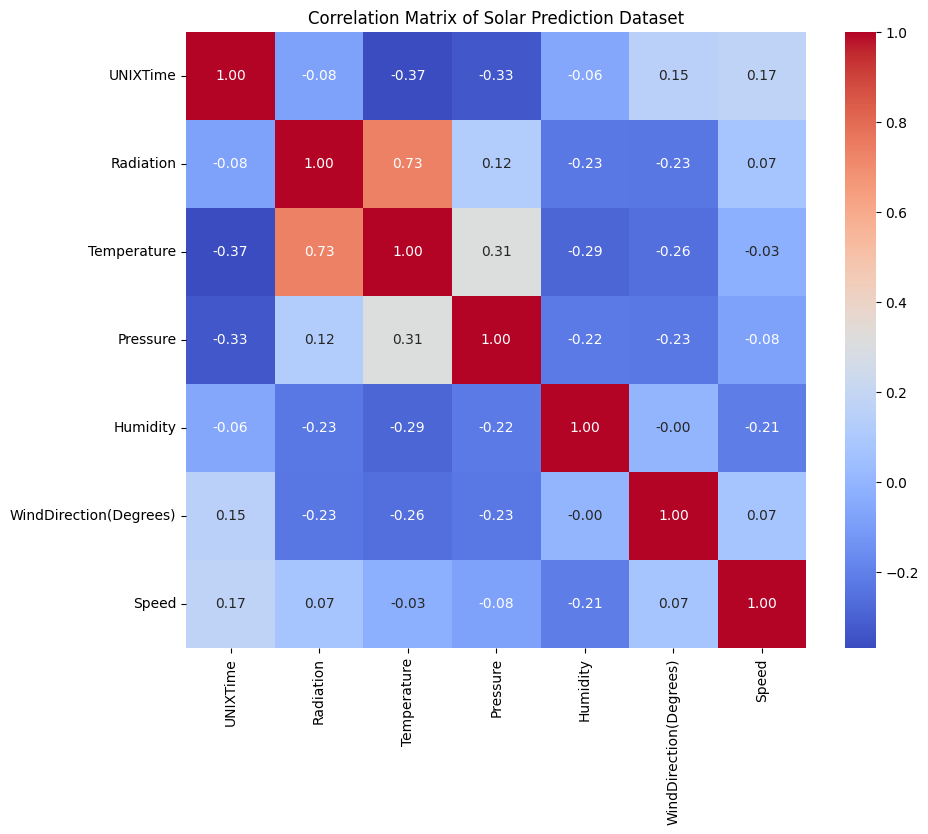

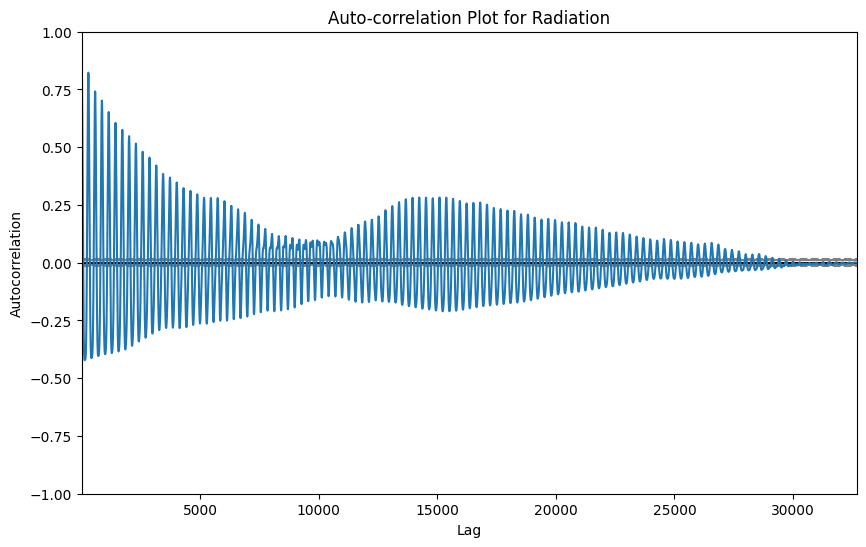

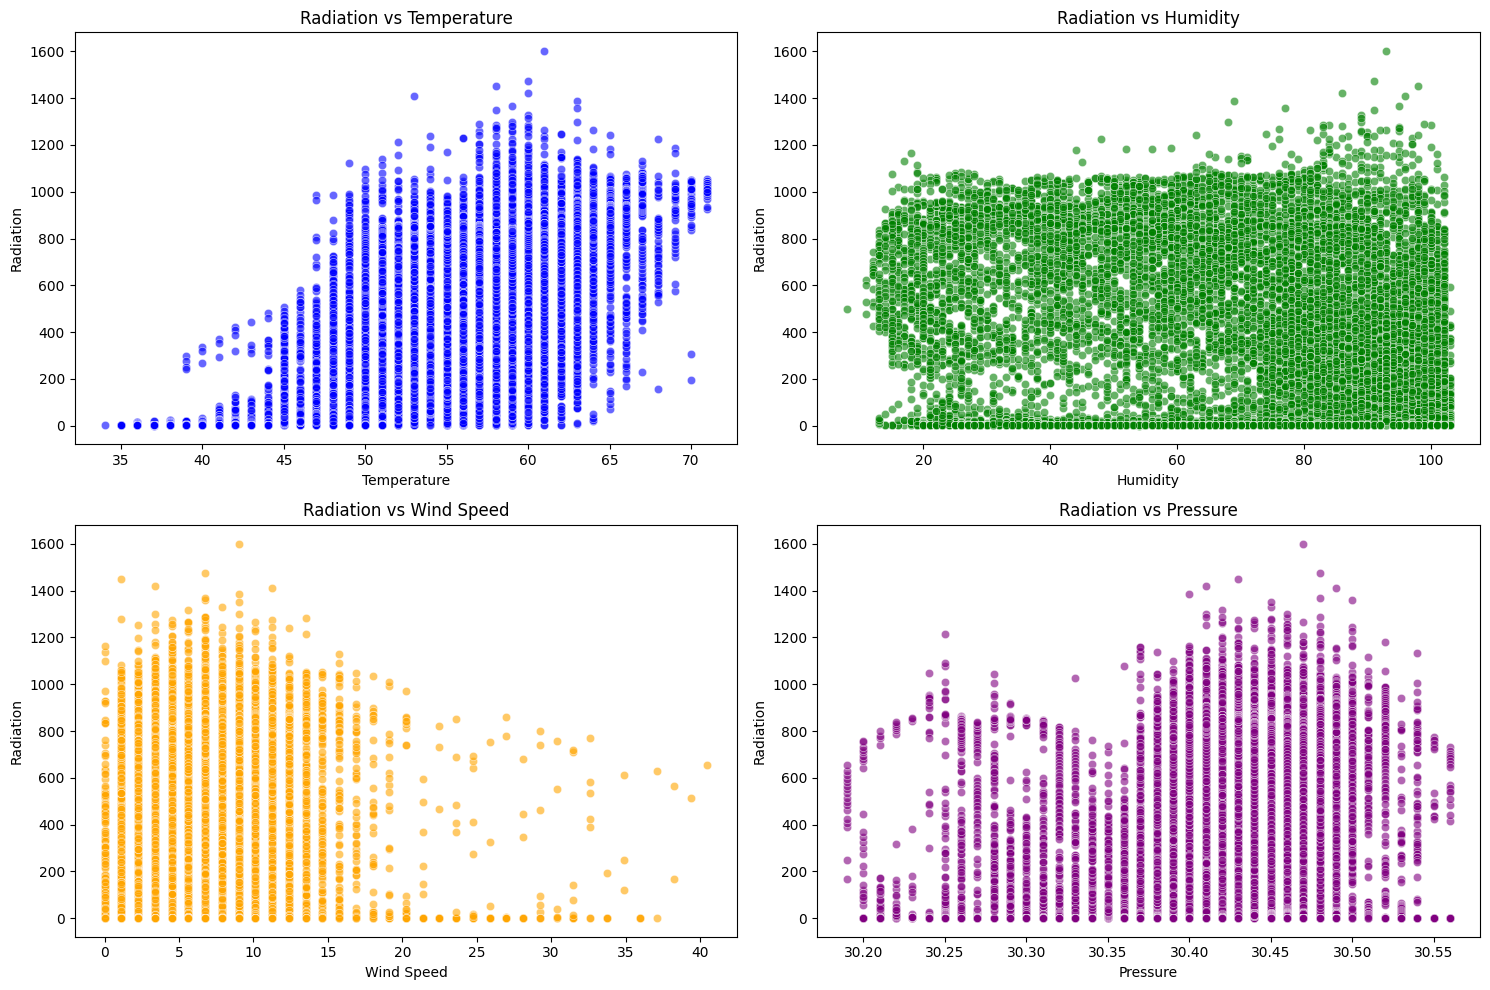

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

# Load the dataset
file_path = 'SolarPrediction.csv'  # Update this path to your dataset location
solar_data = pd.read_csv(file_path)

# Data Overview
print("Dataset Information:")
print(solar_data.info())
print("\nDataset Head:")
print(solar_data.head())

# Visualization 1: Correlation Matrix
def plot_correlation_matrix(data):
    plt.figure(figsize=(10, 8))
    correlation_matrix = data.corr(numeric_only=True)
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Matrix of Solar Prediction Dataset")
    plt.show()

# Visualization 2: Auto-correlation Plot for Solar Radiation
def plot_autocorrelation(data, column):
    plt.figure(figsize=(10, 6))
    autocorrelation_plot(data[column])
    plt.title(f"Auto-correlation Plot for {column}")
    plt.grid()
    plt.show()

# Visualization 3: Radiation Distribution over Features
def plot_radiation_distribution(data):
    plt.figure(figsize=(15, 10))
    
    # Radiation vs Temperature
    plt.subplot(2, 2, 1)
    sns.scatterplot(x=data['Temperature'], y=data['Radiation'], alpha=0.6, color="blue")
    plt.title("Radiation vs Temperature")
    plt.xlabel("Temperature")
    plt.ylabel("Radiation")

    # Radiation vs Humidity
    plt.subplot(2, 2, 2)
    sns.scatterplot(x=data['Humidity'], y=data['Radiation'], alpha=0.6, color="green")
    plt.title("Radiation vs Humidity")
    plt.xlabel("Humidity")
    plt.ylabel("Radiation")

    # Radiation vs Wind Speed
    plt.subplot(2, 2, 3)
    sns.scatterplot(x=data['Speed'], y=data['Radiation'], alpha=0.6, color="orange")
    plt.title("Radiation vs Wind Speed")
    plt.xlabel("Wind Speed")
    plt.ylabel("Radiation")

    # Radiation vs Pressure
    plt.subplot(2, 2, 4)
    sns.scatterplot(x=data['Pressure'], y=data['Radiation'], alpha=0.6, color="purple")
    plt.title("Radiation vs Pressure")
    plt.xlabel("Pressure")
    plt.ylabel("Radiation")

    plt.tight_layout()
    plt.show()

# Run Visualizations
if __name__ == "__main__":
    # Correlation Matrix
    plot_correlation_matrix(solar_data)

    # Auto-correlation for Solar Radiation
    plot_autocorrelation(solar_data, "Radiation")

    # Radiation Distribution Over Temperature, Humidity, Wind Speed, and Pressure
    plot_radiation_distribution(solar_data)


In [3]:
# Pair Plot for Numerical Features
def plot_pairplot(data):
    sns.pairplot(data[['Radiation', 'Temperature', 'Humidity', 'Speed', 'Pressure']])
    plt.title("Pairwise Relationships Between Features")
    plt.show()


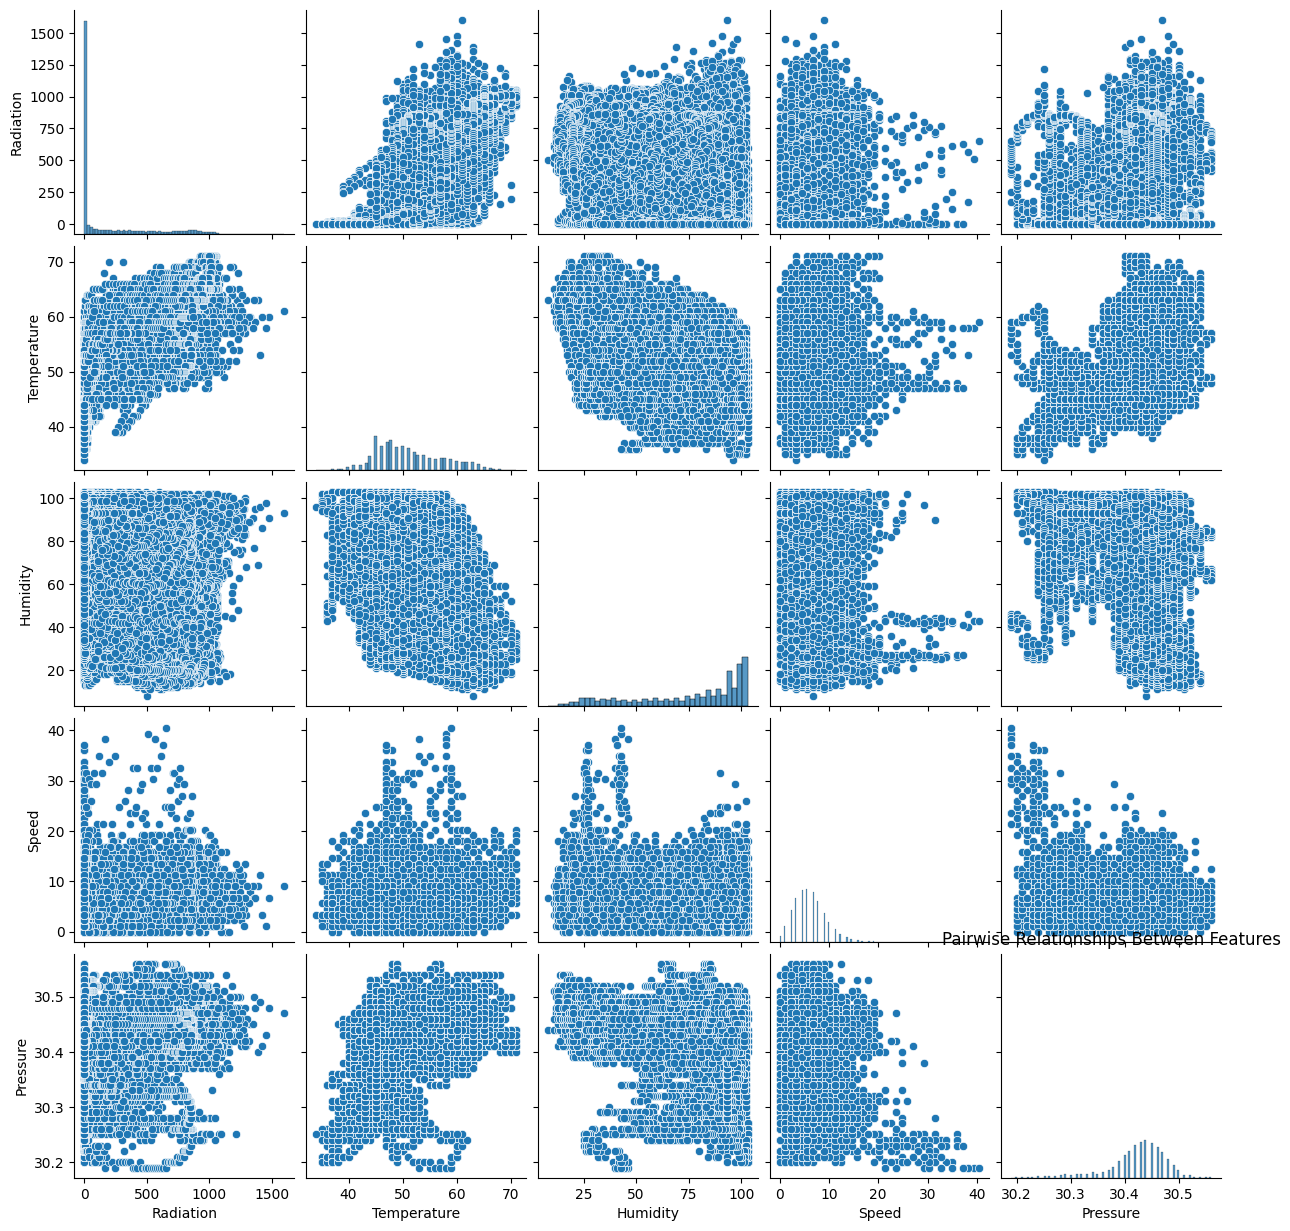

In [7]:
plot_pairplot(solar_data)

In [9]:
# Box Plot: Radiation vs Temperature Bins
def plot_boxplot(data):
    data['Temp_Bin'] = pd.cut(data['Temperature'], bins=5, labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Temp_Bin', y='Radiation', data=data, palette='coolwarm')
    plt.title("Radiation Distribution Across Temperature Bins")
    plt.xlabel("Temperature Bins")
    plt.ylabel("Radiation")
    plt.show()


C:\Users\yunusyosaf\AppData\Local\Temp\ipykernel_16068\478588891.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Temp_Bin', y='Radiation', data=data, palette='coolwarm')


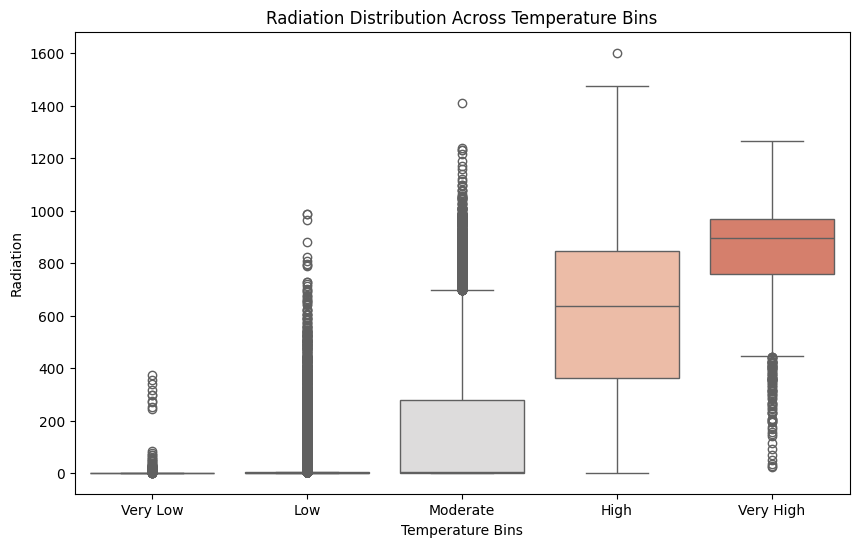

In [10]:
plot_boxplot(solar_data)

In [11]:
# Time Series Plot for Solar Radiation
def plot_time_series(data):
    data['DateTime'] = pd.to_datetime(data['Data'] + ' ' + data['Time'])
    data = data.sort_values(by='DateTime')
    plt.figure(figsize=(15, 6))
    plt.plot(data['DateTime'], data['Radiation'], alpha=0.8, label='Radiation', color='orange')
    plt.title("Time Series Plot of Solar Radiation")
    plt.xlabel("Time")
    plt.ylabel("Radiation")
    plt.legend()
    plt.grid()
    plt.show()


C:\Users\yunusyosaf\AppData\Local\Temp\ipykernel_16068\4051657236.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['Data'] + ' ' + data['Time'])


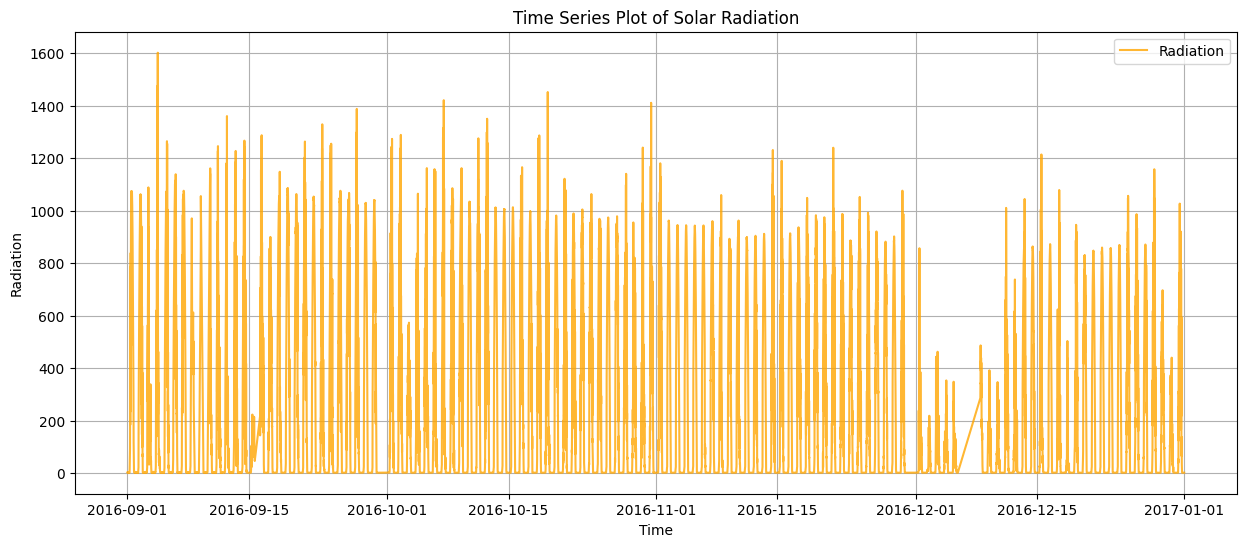

In [13]:
plot_time_series(solar_data)

In [16]:
# Heatmap for Hourly Solar Radiation
def plot_heatmap(data):
    data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour
    data['Day'] = pd.to_datetime(data['Data']).dt.day_name()
    heatmap_data = data.groupby(['Day', 'Hour'])['Radiation'].mean().unstack()
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, cbar=True)
    plt.title("Average Solar Radiation by Day and Hour")
    plt.xlabel("Hour")
    plt.ylabel("Day")
    plt.show()
    


C:\Users\yunusyosaf\AppData\Local\Temp\ipykernel_16068\1648754040.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Day'] = pd.to_datetime(data['Data']).dt.day_name()


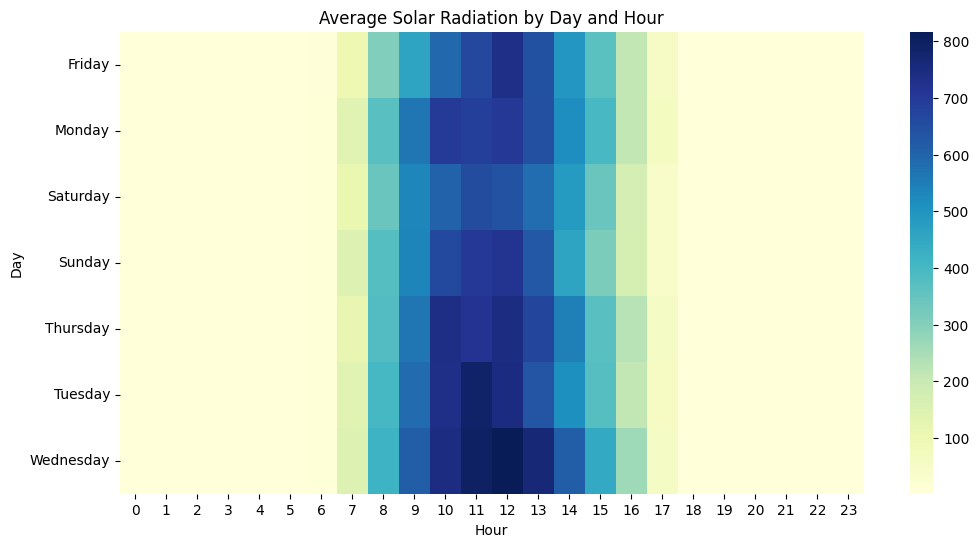

In [19]:

plot_heatmap(solar_data)